<AxesSubplot:>

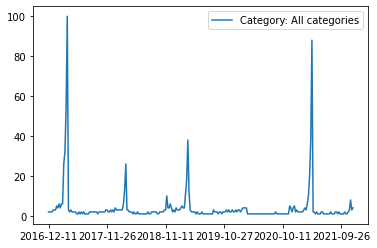

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

gonzaga_university = pd.Series(dtype=float)
gonzaga_university = pd.read_csv("csv_files/gonzaga_university.csv")

gonzaga_university.dropna(inplace=True)
gonzaga_university = gonzaga_university.drop(labels=["Week"])

gonzaga_university = gonzaga_university.astype(float)
gonzaga_university.plot()


C:\Users\benpu\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


<AxesSubplot:>

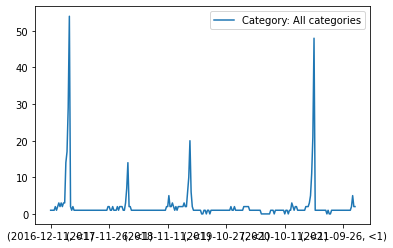

In [2]:
march_madness = pd.Series(dtype=float)
march_madness = pd.read_csv("csv_files/march_madness_bracket.csv")

march_madness.dropna(inplace=True)
march_madness = march_madness.drop(labels=["Week"])
march_madness.replace("<1",0,inplace=True)

march_madness = march_madness.astype(float)
march_madness.plot()

In [3]:
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import numpy as np

def get_slope_val(df):
    df.reset_index(inplace=True)
    y=np.array(df["Category: All categories"].dropna().values, dtype=float)
    x=np.array(df["Category: All categories"].dropna().index.values)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
    xf = np.linspace(min(x),max(x),100)
    yf = (slope*xf)+intercept
    
    f, ax = plt.subplots(1, 1)
    ax.plot(xf, yf,label='Linear fit', lw=3)
    df["Category: All categories"].dropna().plot(ax=ax,marker='o', ls='')
    print()
    ax.legend();
    plt.show()
    
    return slope

In [4]:
def get_correlation(df1,df2):
    y=np.array(df1["Category: All categories"].dropna().values, dtype=float)
    x=np.array(df2["Category: All categories"].dropna().values,dtype=float)
    correlation,p = stats.pearsonr(x, y)
    return correlation

gonzaga_university



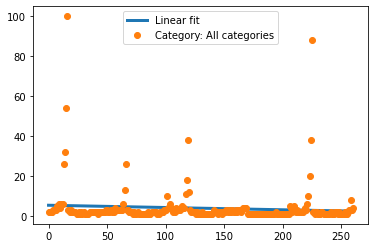

Slope: -0.011359264583797338
march_madness



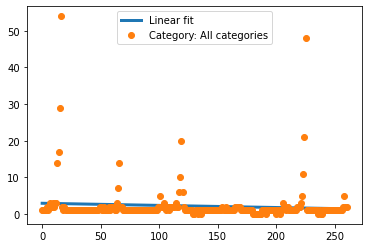

Slope: -0.005801121752687955


In [5]:
print("gonzaga_university")
print("Slope:",get_slope_val(gonzaga_university))
print("march_madness")
print("Slope:",get_slope_val(march_madness))

In [6]:
print("The correlation between the search terms \"Gonzaga University\" and \"March Madness Brackets\" are",get_correlation(gonzaga_university,march_madness))

The correlation between the search terms "Gonzaga University" and "March Madness Brackets" are 0.9977684495143159
